# One Dimensional Fermi -Boson map with QuTiP: Introduction

Saumya Biswas (sbiswas4@umd.edu)

For more information about QuTiP see [http://qutip.org](http://qutip.org)

We introduce the basic functionality of QuTiPs Lattice1d class of the lattice module.

# About

The qutip.lattice module enables defining tight binding/lattice models for bosons and fermions on lattices and calculating their fundamental properties specially features arising from the translational symmetry of the lattice. The lattice classes defined are compatible with the rest of the functionalities of QuTiP and can make use of them quite conveniently.

## Multiparticle physics

Lattice1d_f_Hubbard class deals with multi-particle physics of spin-$1/2$ electrons with the Fermi Hubbard model.

![title](images/latt_1.png)

## The Fermi-Hubbard model
Defining an instance of the Lattice1d class requires formatting the second Quantized Hamiltonian in a unitcell based structure with nearest neighbor coupling only. Howewver, the functionality is limited to single particle physics only in Lattice1d class methods.

\begin{eqnarray}
H = \sum_{j, \sigma} (\epsilon - \mu) c_{j,\sigma}^{\dagger} c_{j,\sigma} + \sum_{\langle j,k \rangle,\sigma} t_{j,k} c_{j,\sigma}^{\dagger} c_{k,\sigma} + U\sum_j c_{j,\uparrow}^{\dagger} c_{j,\downarrow}^{\dagger} c_{j,\downarrow} c_{j,\uparrow}  \label{eq:FermiHubbard} 
\end{eqnarray}

where $c_i$ is the fermionic annihilation operator, $t_{j,k}$ is the nearest neighbour hopping. 

The Lattice1d_f_Hubbard class defines a 1d Fermi Hubbard model with nearest neighbor hopping t and interaction strength U.

## How to Define a One Dimensional Fermi Hubbard Model

In [1]:
from qutip import (Qobj, tensor, basis, qeye, isherm, sigmax, sigmay, sigmaz, sigmam, sigmap, num,
                   create, destroy, mesolve, Options)
from qutip_lattice import *
import matplotlib.pyplot as plt
import numpy as np

## Conventions and Notations

Fermionic wavefunctions are written out in the basis with a fixed number of particles, $N = N_{\uparrow}+N_{\downarrow}$

\begin{eqnarray}
| \Psi_F \rangle = \sum_{x,y} w_F(x,y) |\bf{x}, \bf{y} \rangle
\end{eqnarray}
Here, $\bf{x}=(x_1,x_2,....,x_{N_{\uparrow}} )$ and $\bf{y}=(y_1,y_2,....,y_{N_{\downarrow}} )$ indicate the sites occupied respectively by the spin-up and spin-down ($spin-\frac{1}{2}$) fermions and $ x_i \neq x_j, y_i\neq y_j \forall i,j$. Basis states are normal ordered. The definition is,
\begin{eqnarray}
|x, y \rangle = f^{\dagger}_{x_1,\uparrow}f^{\dagger}_{x_2,\uparrow}....f^{\dagger}_{x_{N_{\uparrow}} ,\uparrow}f^{\dagger}_{y_1,\downarrow}f^{\dagger}_{y_2,\downarrow}....f^{\dagger}_{y_{N_{\downarrow}},\downarrow} | vac \rangle
\end{eqnarray}
So, the down-spin creation operators act first in the order of decreasing positional index, then the up-spin creation operators in the same style.



The off-diagonal elements arising from the Hamiltonian nearest neighbour hopping term $(-t) f^{\dagger}_{x_{a},\uparrow} f_{x_{a+1},\uparrow}$ is nonzero only between, 
\begin{eqnarray}
\langle x^f, y^f | = \langle vac | f_{y_{N_{\downarrow}}, \downarrow}....f_{y_2,\downarrow}f_{y_1,\downarrow} f_{x_{N_{\uparrow}},\uparrow} ..f_{x_a,\uparrow}.. f_{x_2,\uparrow}f_{x_1,\uparrow}  
\end{eqnarray}
and
\begin{eqnarray}
|x, y \rangle = f^{\dagger}_{x_1,\uparrow}f^{\dagger}_{x_2,\uparrow}..f^{\dagger}_{x_{a+1},\uparrow}..f^{\dagger}_{x_{N_{\uparrow}} ,\uparrow}f^{\dagger}_{y_1,\downarrow}f^{\dagger}_{y_2,\downarrow}....f^{\dagger}_{y_{N_{\downarrow}},\downarrow} | vac \rangle
\end{eqnarray}
i.e. they would have all the same spin occupied positions except for $x_a$ and $x_{a+1}$. Only $\langle x^f, y^f |$ will have $x_a$ and only $|x, y \rangle$ will have $x_{a+1}$.



\begin{eqnarray}
\langle vac | f_{y^{f}_{N_{\downarrow}},\downarrow }...... f_{y^{f}_2,\downarrow}f_{y^{f}_1,\downarrow} f_{x^{f}_{N_{\uparrow}},\uparrow}..f_{x^{f}_{a},\uparrow}... f_{x^{f}_2,\uparrow}f_{x^{f}_1,\uparrow} \ \ \ \ \ \ (-t) f^{\dagger}_{x_{a},\uparrow} f_{x_{a+1},\uparrow} \ \ \ \ \ \ f^{\dagger}_{x_1,\uparrow}f^{\dagger}_{x_2,\uparrow}..f^{\dagger}_{x_{a+1},\uparrow}..f^{\dagger}_{x_{N_{\uparrow}}}f^{\dagger}_{y_1,\downarrow}f^{\dagger}_{y_2,\downarrow}....f^{\dagger}_{y_{N_{\downarrow}}} | vac \rangle \nonumber\\
=(-1)^{a}\langle vac | f_{y^{f}_{N_{\downarrow}},\downarrow }...... f_{y^{f}_2,\downarrow}f_{y^{f}_1,\downarrow} f_{x^{f}_{N_{\uparrow}},\uparrow}..f_{x^{f}_{a},\uparrow}... f_{x^{f}_2,\uparrow}f_{x^{f}_1,\uparrow} \ \ \ \ \ \ (-t) f^{\dagger}_{x_a,\uparrow}  \ \ \ \ \ \ f^{\dagger}_{x_1,\uparrow}f^{\dagger}_{x_2,\uparrow}.. f_{x_{a+1},\uparrow}f^{\dagger}_{x_{a+1},\uparrow}..f^{\dagger}_{x_{N_{\uparrow}}}f^{\dagger}_{y_1,\downarrow}f^{\dagger}_{y_2,\downarrow}....f^{\dagger}_{y_{N_{\downarrow}}} | vac \rangle \nonumber\\
=(-1)^{a}\langle vac | f_{y^{f}_{N_{\downarrow}},\downarrow }...... f_{y^{f}_2,\downarrow}f_{y^{f}_1,\downarrow} f_{x^{f}_{N_{\uparrow}},\uparrow}..f_{x^{f}_{a},\uparrow}... f_{x^{f}_2,\uparrow}f_{x^{f}_1,\uparrow} \ \ \ \ \ \ (-t)f^{\dagger}_{x_a,\uparrow}  \ \ \ \ \ \ f^{\dagger}_{x_1,\uparrow}f^{\dagger}_{x_2,\uparrow}.. \left(1-f^{\dagger}_{x_{a+1},\uparrow}f_{x_{a+1},\uparrow}\right) ...f^{\dagger}_{x_{N_{\uparrow}}}f^{\dagger}_{y_1,\downarrow}f^{\dagger}_{y_2,\downarrow}....f^{\dagger}_{y_{N_{\downarrow}}} | vac \rangle \nonumber\\
=(-1)^{2a}\langle vac | f_{y^{f}_{N_{\downarrow}},\downarrow }...... f_{y^{f}_2,\downarrow}f_{y^{f}_1,\downarrow} f_{x^{f}_{N_{\uparrow}},\uparrow}..f_{x^{f}_{a},\uparrow}... f_{x^{f}_2,\uparrow}f_{x^{f}_1,\uparrow} \ \ \ \ \ \ (-t)  \ \ \ \ \ \ f^{\dagger}_{x_1,\uparrow}f^{\dagger}_{x_2,\uparrow}..f^{\dagger}_{x_{a},\uparrow}\left(1-f^{\dagger}_{x_{a+1},\uparrow}f_{x_{a+1},\uparrow}\right)..f^{\dagger}_{x_{N_{\uparrow}}}f^{\dagger}_{y_1,\downarrow}f^{\dagger}_{y_2,\downarrow}....f^{\dagger}_{y_{N_{\downarrow}}} | vac \rangle \nonumber\\
=\langle vac | f_{y^{f}_{N_{\downarrow}},\downarrow }...... f_{y^{f}_2,\downarrow}f_{y^{f}_1,\downarrow} f_{x^{f}_{N_{\uparrow}},\uparrow}..f_{x^{f}_{a},\uparrow}... f_{x^{f}_2,\uparrow}f_{x^{f}_1,\uparrow} \ \ \ \ \ \ (-t)  \ \ \ \ \ \ f^{\dagger}_{x_1,\uparrow}f^{\dagger}_{x_2,\uparrow}..f^{\dagger}_{x_{a},\uparrow}..f^{\dagger}_{x_{N_{\uparrow}}}f^{\dagger}_{y_1,\downarrow}f^{\dagger}_{y_2,\downarrow}....f^{\dagger}_{y_{N_{\downarrow}}} | vac \rangle \nonumber\\
=(-t)
\end{eqnarray}
In deriving the above, $f_{x_{a+1},\uparrow}f^{\dagger}_{x_{a+1},\uparrow} = \{f_{x_{a+1},\uparrow},f^{\dagger}_{x_{a+1},\uparrow} \}-f^{\dagger}_{x_{a+1},\uparrow}f_{x_{a+1},\uparrow}$ was used.





## Particle number symmetric basis: Fermions

In [2]:
fermiHubbardLattice = Lattice1d_fermi_Hubbard( num_sites=4, boundary="aperiodic", t=1, U=-2)
[Hamiltonian_f, basisStatesUp_f, basisStatesDown_f, normHubbardStates_f] = fermiHubbardLattice.Hamiltonian( fillingUp=2, fillingDown=2, kval=None)

In [3]:
[basisStatesUp_f,basisStatesDown_f]

[array([[0., 0., 1., 1.],
        [0., 1., 0., 1.],
        [0., 1., 1., 0.],
        [1., 0., 0., 1.],
        [1., 0., 1., 0.],
        [1., 1., 0., 0.]]),
 array([[0., 0., 1., 1.],
        [0., 1., 0., 1.],
        [0., 1., 1., 0.],
        [1., 0., 0., 1.],
        [1., 0., 1., 0.],
        [1., 1., 0., 0.]])]

All the operators computed are in the chosen basis with number and translational symmetry labeled by number and k-value.

In [4]:
Hamiltonian_f

Quantum object: dims = [[36], [36]], shape = (36, 36), type = oper, isherm = True
Qobj data =
[[ 2.  -1.   0.  ...  0.   0.   0. ]
 [-1.   3.  -1.  ...  0.   0.   0. ]
 [ 0.  -1.   0.5 ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  0.5 -1.   0. ]
 [ 0.   0.   0.  ... -1.   3.  -1. ]
 [ 0.   0.   0.  ...  0.  -1.   2. ]]

## Particle Number Symmetric Basis: Bosons

In [5]:
bose2cHubbardLattice = Lattice1d_2c_hcb_Hubbard( num_sites=4, boundary="aperiodic", t=1, Uab=-2)
[Hamiltonian_hcb, basisReprUp_hcb, DownStatesPerRepr_hcb, normHubbardStates_hcb] = bose2cHubbardLattice.Hamiltonian( fillingUp=2, fillingDown=2, kval=None)

In [6]:
Hamiltonian_hcb

Quantum object: dims = [[36], [36]], shape = (36, 36), type = oper, isherm = True
Qobj data =
[[-4. -1.  0. ...  0.  0.  0.]
 [-1. -2. -1. ...  0.  0.  0.]
 [ 0. -1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2. -1.  0.]
 [ 0.  0.  0. ... -1. -2. -1.]
 [ 0.  0.  0. ...  0. -1. -4.]]

## Spectral Equivalence

The number of rows in basisReprUp denotes the number of spin-up bases and each row is appended with each rows of the corresponding matrix in DownStatesPerRepr for a basis vector with approved k-value.

In [7]:
Hamiltonian_f.eigenenergies()

array([-3.81377944, -3.32137492, -1.5300261 , -1.32853062, -1.20665208,
       -0.86016744, -0.51307963, -0.45558825,  0.04537272,  0.45084258,
        0.69188281,  0.90731185,  1.02943507,  1.03414965,  1.08457735,
        1.44056612,  1.74583095,  1.78674552,  1.9953164 ,  2.25153967,
        2.49607244,  2.62628659,  3.157936  ,  3.46629114,  3.57590798,
        3.62960444,  4.        ,  4.35810133,  4.67710819,  4.70084224,
        4.94366805,  5.20651273,  5.3693757 ,  5.54572419,  6.07460557,
        6.73759121])

normHubbard states are the corresponding normalized states.

In [8]:
Hamiltonian_hcb.eigenenergies()

array([-6.87594281e+00, -6.08715446e+00, -5.32340428e+00, -5.02516861e+00,
       -4.81974075e+00, -4.48088523e+00, -4.23606798e+00, -4.00000000e+00,
       -4.00000000e+00, -3.68133064e+00, -3.52111856e+00, -3.00000000e+00,
       -3.00000000e+00, -2.82169397e+00, -2.44772352e+00, -2.35792637e+00,
       -2.27117635e+00, -2.00000000e+00, -2.00000000e+00, -1.72882365e+00,
       -1.64207363e+00, -1.55227648e+00, -1.17830603e+00, -1.00000000e+00,
       -1.00000000e+00, -4.78881440e-01, -3.18669356e-01, -6.42457039e-16,
       -5.10523546e-16,  2.36067977e-01,  4.80885229e-01,  8.19740752e-01,
        1.02516861e+00,  1.32340428e+00,  2.08715446e+00,  2.87594281e+00])

Setting any argument to None gives a basis does not make use of that symmetry.

## boson-fermion mapping

In [9]:
states_hcb = Hamiltonian_hcb.eigenstates()
states_f = Hamiltonian_f.eigenstates()

Setting any argument to None gives a basis does not make use of that symmetry.

In [10]:
states_f[0][11]

0.9073118461045251

In [11]:
states_hcb[0][12]

-2.9999999999999916

In [12]:
wF = states_f[1][11]

In [13]:
wB = states_hcb[1][12]

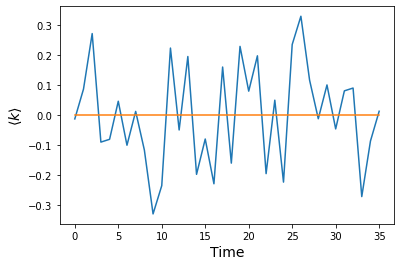

In [14]:
xarr = np.arange(0,36)
plt.plot(xarr, np.real(wF))
plt.plot(xarr, np.imag(wF))
plt.xlabel('Time', fontsize=14)
plt.ylabel(r'$\langle k \rangle$', fontsize=14)
#plt.ylim([-1e-8, 1e-8])
plt.show()
plt.close()

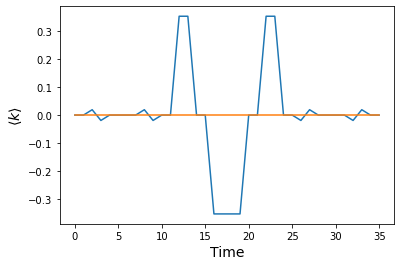

In [15]:
xars = np.arange(0,36)
plt.plot(xars, np.real(wB))
plt.plot(xars, np.imag(wB))
plt.xlabel('Time', fontsize=14)
plt.ylabel(r'$\langle k \rangle$', fontsize=14)
#plt.ylim([-1e-8, 1e-8])
plt.show()
plt.close()

## Particle number symmetric basis: Fermions

In [16]:
fermiHubbardLattice = Lattice1d_fermi_Hubbard( num_sites=4, boundary="periodic", t=1, U=-2)
[Hamiltonian_f, basisReprUp_f, DownStatesPerRepr_f, normHubbardStates_f] = fermiHubbardLattice.Hamiltonian( fillingUp=None, fillingDown=None, kval=None)

All the operators computed are in the chosen basis with number and translational symmetry labeled by number and k-value.

In [17]:
Hamiltonian_f

Quantum object: dims = [[256], [256]], shape = (256, 256), type = oper, isherm = True
Qobj data =
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  1. -1. ...  0.  0.  0.]
 [ 0. -1.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  5. -1.  0.]
 [ 0.  0.  0. ... -1.  5.  0.]
 [ 0.  0.  0. ...  0.  0.  8.]]

## Particle Number Symmetric Basis: Bosons

In [18]:
bose2cHubbardLattice = Lattice1d_2c_hcb_Hubbard( num_sites=4, boundary="periodic", t=1, Uab=-2)
[Hamiltonian_hcb, basisReprUp_hcb, DownStatesPerRepr_hcb, normHubbardStates_hcb] = bose2cHubbardLattice.Hamiltonian( fillingUp=None, fillingDown=None, kval=None)

In [19]:
Hamiltonian_hcb

Quantum object: dims = [[256], [256]], shape = (256, 256), type = oper, isherm = True
Qobj data =
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0. -1. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -6. -1.  0.]
 [ 0.  0.  0. ... -1. -6.  0.]
 [ 0.  0.  0. ...  0.  0. -8.]]

## Spectral Equivalence

# Example: Symmetry protected Dynamics¶

We now calculate a dynamics with loss operators and expectation values of given operators.

No specific physics conceived of in this exercise.

### References
[1] J. R. Johansson, P. D. Nation, and F. Nori, Comp. Phys. Comm. 183, 1760 (2012). http://qutip.org 

[2] B. Paredes and J. I. Cirac. Phys. Rev. Lett. 90, 150402 (2003)
https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.90.150402

In [ ]:
import qutip
qutip.about()

In [ ]:
qutip.cite()